 
Auto Encoder Model 

Fully Connected Network & Convolutional Neural Network



References are stated on READ.me 



In [ ]:
#-------------------------------------------------------------------------------
# Imports
#-------------------------------------------------------------------------------
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from numpy import array, where
from random import choice, randrange



TensorFlow 1.x selected.


In [ ]:
#-------------------------------------------------------------------------------
# Loading MNIST data set
#-------------------------------------------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../MNIST_data/")


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
#-------------------------------------------------------------------------------
#                              METHODS                                         
#-------------------------------------------------------------------------------
#  Converting results with t-SNE                                                  
#-------------------------------------------------------------------------------
def convert_2D_tsne(input, label):
  X = np.zeros((input.shape[0], input.shape[1]))

  for i in range(input.shape[0]):
    X[i] = input[i].flatten()
  
  X = pd.DataFrame(X)
  df = X
  tsne = TSNE(n_iter=300)
  tsne_results = tsne.fit_transform(df.values)
  return tsne_results

#-------------------------------------------------------------------------------
#  Plotting results in 2D plot                                                
#-------------------------------------------------------------------------------

def plot_2D(input_tsne,embedded_images_tsne, embedded_images_conv_tnse, label):

  Y = pd.DataFrame(label)

  # Create the figure
  fig = plt.figure( figsize=(30,20) )
  fig.suptitle('Comparison of FCN and CNN', fontsize=18)

  ax1 = plt.subplot(2, 3, 1)
  ax1.set_title(" Original Test Images ")

  ax2 = plt.subplot(2, 3, 2)
  ax2.set_title(" Embedded Test Images From Fully Connected Network ")

  ax3 = plt.subplot(2, 3, 3)
  ax3.set_title(" Embedded Test Images From CNN ")

  sct1 = ax1.scatter(
      x=input_tsne[:,0], 
      y=input_tsne[:,1],
      c=Y, 
      cmap=plt.cm.get_cmap('Paired'), 
      alpha=0.4)
 
  sct2 = ax2.scatter(
      x=embedded_images_tsne[:,0], 
      y=embedded_images_tsne[:,1],
      c=Y, 
      cmap=plt.cm.get_cmap('Paired'), 
      alpha=0.4)
 
  sct3 = ax3.scatter(
      x=embedded_images_conv_tnse[:,0], 
      y=embedded_images_conv_tnse[:,1],
      c=Y, 
      cmap=plt.cm.get_cmap('Paired'), 
      alpha=0.4)

  legend1 = ax1.legend(*sct1.legend_elements(num=10),loc="upper right", title="Classes")
  legend2 = ax2.legend(*sct2.legend_elements(num=10),loc="upper right", title="Classes")
  legend3 = ax3.legend(*sct3.legend_elements(num=10),loc="upper right", title="Classes")

  ax1.add_artist(legend1)
  ax2.add_artist(legend2)
  ax3.add_artist(legend3)

  plt.show()

#-------------------------------------------------------------------------------
# Plotting Figures                                                             
#-------------------------------------------------------------------------------

def plot_figures(images, dimension, units_in_plot, title):
  figure = plt.figure(figsize=(20, 4))
  figure.suptitle(title, fontsize=18)
  for i in range(units_in_plot):
      # Plotting images
      ax = plt.subplot(3, units_in_plot, i + 1)
      plt.imshow(images[i].reshape(dimension, dimension))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)


def plot_single_figure(image, dimension, title):
  figure = plt.figure(figsize=(20, 2))
  #figure.suptitle(title, fontsize=12)
  # Plotting images
  ax = plt.subplot(111)
  ax.set_title(title, loc='left')
  plt.imshow(image.reshape(dimension, dimension))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

#-------------------------------------------------------------------------------
# Creating Layers Fully Connected Network
#-------------------------------------------------------------------------------

def weight_variable(name, shape):
  return tf.get_variable('W_'+name, dtype=tf.float32, shape=shape, initializer=tf.truncated_normal_initializer(stddev=0.01))

def bias_variable(name, shape):
  return tf.get_variable('b_'+name, dtype=tf.float32, initializer=tf.constant(0., shape=shape, dtype=tf.float32))

def create_fc_layer(x, num_units, name):
  input_dim = x.get_shape()[1]
  W = weight_variable(name, shape=[input_dim, num_units])
  b = bias_variable(name, [num_units])
  layer = tf.matmul(x, W) + b
  layer = tf.nn.sigmoid(layer)
  return layer

#-------------------------------------------------------------------------------
# Creating Layers for CNN
#-------------------------------------------------------------------------------

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides=[1,2,2,1], padding='SAME')

def weight_variable_conv(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable_conv(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)





In [ ]:
#-------------------------------------------------------------------------------
# Hyperparameters
#-------------------------------------------------------------------------------

# Images 28 X 28 pixels
img_h = img_w = 28

# Total number of pixels
input_size = img_h * img_w

# Total number of training loop 
epochs = 50

# Subsample size 
batch_size = 256

# Result print cycle
display_step = 100

# Learning rate
learning_rate = 0.001

# Number of units in the encoder and decoder layers
units_in_hidden = 128

#Number of units in embedding layer
units_in_embedding = 64

#Number of figures in plot
units_in_plot = 10 

 

**Implementing Fully Connected Network - AutoEncoder**

In [ ]:
#-------------------------------------------------------------------------------
# Creating Fully Connected Network
#-------------------------------------------------------------------------------

# Creating the network graph
#-------------------------------------------------------------------------------
# For Auto-encoder and Auto-decoder number of input and output neurons are equal.
x = tf.placeholder(tf.float32, shape=[None, input_size], name='X')
y = tf.placeholder(tf.int64, shape = [None])

# Create fully connected layers in the order below :
# Input ( X ) -> Encoder Layer -> Embedding ( Code Layer ) -> Decoder Layer -> Output ( X_HAT )

encoder = create_fc_layer(x, units_in_hidden, "encoder")
embedding = create_fc_layer(encoder, units_in_embedding, "embedding")
decoder = create_fc_layer(embedding, units_in_hidden, "decoder")
output = create_fc_layer(decoder, input_size, "output")



In [ ]:
#-------------------------------------------------------------------------------
# Defining Loss Function and Alternative Optimizers
#-------------------------------------------------------------------------------

# Mean square error would be used as loss function
loss = tf.reduce_mean(tf.square(output - x))

# Three optimizer would be used for different combinations,
# ultimately adam is selected
rmsprop = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)
adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
#-------------------------------------------------------------------------------
# Training Phase for Fully Connected Network
#-------------------------------------------------------------------------------
x_train = mnist.train.labels
num_iter = int(len(x_train)/ batch_size)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  print('Training is started !')
  for epoch in range(epochs):
    print("Epoch: {0} started ".format(epoch +1))
    print('--------------------------------------------------------------------')
    for i in range(num_iter):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        adam.run({x: x_batch})
        
        if i % display_step == 0:
            train_loss = loss.eval({x: x_batch})
            print("Step : {0}    Train Loss : {1:.5f}".format(i, train_loss))
        
    x_valid, y_valid  = mnist.validation.next_batch(batch_size)
    valid_loss = loss.eval({x: x_valid})
    print('--------------------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.5f}".format(epoch + 1, valid_loss))
    print('--------------------------------------------------------------------')

  # Calculating test loss
  x_test = mnist.test.images
  test_loss = loss.eval({x: x_test})
  print('--------------------------------------------------------------------')
  print("Test Loss : {0:.5f}".format(test_loss))
  print('--------------------------------------------------------------------')
  print('Training is completed !')

# Decoding test image set within the same session
#-------------------------------------------------------------------------------
  x_test = {x: mnist.test.images}
  y_test = {y:mnist.test.labels}
  x_hat = output.eval(x_test)

# Encoded image data 
#-------------------------------------------------------------------------------
  embedded_images= embedding.eval(x_test)


Training is started !
Epoch: 1 started 
--------------------------------------------------------------------
Step : 0    Train Loss : 0.21980
Step : 100    Train Loss : 0.06743
Step : 200    Train Loss : 0.06699
--------------------------------------------------------------------
Epoch: 1, validation loss: 0.06777
--------------------------------------------------------------------
Epoch: 2 started 
--------------------------------------------------------------------
Step : 0    Train Loss : 0.06873
Step : 100    Train Loss : 0.06518
Step : 200    Train Loss : 0.06846
--------------------------------------------------------------------
Epoch: 2, validation loss: 0.06742
--------------------------------------------------------------------
Epoch: 3 started 
--------------------------------------------------------------------
Step : 0    Train Loss : 0.06677
Step : 100    Train Loss : 0.06748
Step : 200    Train Loss : 0.06830
--------------------------------------------------------------


**Implementing Convolutional Neural Network - AutoEncoder**



In [ ]:
#-------------------------------------------------------------------------------
# Converting Fully Connected Network to Convolutional Neural Network
#-------------------------------------------------------------------------------

# Create convolutional and  fully connected layers in the order below :

# Input ( X ) -> First Convolutional Layer ( Encoder )
#             -> First Pooling Layer 
#             -> Second Convolutional Layer ( Embedding)
#             -> Second Pooling Layer
#             -> First Fully Connected Layer ( Decoder 1)
#             -> Second Fully Connected Layer ( Decoder 2)
#             -> Output

print("-----------------------------------")
print("Shape information of layers on CNN")
print("-----------------------------------")

# INPUT
x_input = tf.placeholder(tf.float32, shape = [None, 784], name="x_input")
print("x_input      : ", x_input.shape)

x_image = tf.reshape(x_input, [-1, 28, 28, 1])
print("x_image          : ", x_image.shape)


# CONVOLUTION 1
c_weights_1 = weight_variable_conv([5,5,1,32])
c_bias_1 = bias_variable_conv([32])

convolution_1 = tf.nn.relu(conv2d(x_image, c_weights_1) + c_bias_1)
print("convolution_1    : ", convolution_1.shape)

pooling_1 = max_pool_2x2(convolution_1)
print("pooling_1        : ", pooling_1.shape)


# CONVOLUTION 2
c_weights_2 = weight_variable_conv([5,5,32,64])
c_bias_1 = bias_variable_conv([64])

convolution_2 = tf.nn.relu(conv2d(pooling_1, c_weights_2) + c_bias_1)
print("convolution_2    :", convolution_2.shape)


pooling_2 = max_pool_2x2(convolution_2)
print("pooling_2        :", pooling_2.shape)


# FULLY CONNECTED 1 
pooling_2_flat = tf.reshape(pooling_2, [-1, 7 * 7 * 64])
print("pooling_2_flat   :", pooling_2_flat.shape)


f_weights_1 = weight_variable_conv([7 * 7 * 64, 64])
f_bias_1 = bias_variable_conv([64])

embedding_conv = tf.nn.relu(tf.matmul(pooling_2_flat, f_weights_1) + f_bias_1)
print("embedding_conv   :", embedding_conv.shape)


# FULLY CONNECTED 2
f_weights_2 = weight_variable_conv([64,128])
f_bias_2 = bias_variable_conv([128])

decoder_conv = tf.nn.relu(tf.matmul(embedding_conv, f_weights_2) + f_bias_2)
print("decoder_conv     :", decoder_conv.shape)


# FULLY CONNECTED 3 - OUTPUT
f_weights_3 = weight_variable_conv([128,784])
f_bias_3 = bias_variable_conv([784])

output_conv = tf.nn.sigmoid(tf.matmul(decoder_conv, f_weights_3) + f_bias_3)
print("output_conv      :", output_conv.shape)



-----------------------------------
Shape information of layers on CNN
-----------------------------------
x_input      :  (?, 784)
x_image          :  (?, 28, 28, 1)
convolution_1    :  (?, 28, 28, 32)
pooling_1        :  (?, 14, 14, 32)
convolution_2    : (?, 14, 14, 64)
pooling_2        : (?, 7, 7, 64)
pooling_2_flat   : (?, 3136)
embedding_conv   : (?, 64)
decoder_conv     : (?, 128)
output_conv      : (?, 784)


In [ ]:
#-------------------------------------------------------------------------------
# Defining Loss Function and Alternative Optimizers
#-------------------------------------------------------------------------------

# Mean square error would be used as loss function
loss_for_convolution = tf.reduce_mean(tf.square(output_conv - x_input))

# Three optimizer would be used for different combinations,
# ultimately adam is selected
rmsprop_for_convoluiton  = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss_for_convolution)
adam_for_convoluiton  = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_for_convolution)


In [ ]:
#-------------------------------------------------------------------------------
# Training Phase with CNN
#-------------------------------------------------------------------------------


num_iter = int(len(x_train)/ batch_size)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  print('Training is started !')
  for epoch in range(epochs):
    print("Epoch: {0} started ".format(epoch +1))
    print('--------------------------------------------------------------------')
    for i in range(num_iter):

        x_batch, y_batch = mnist.train.next_batch(batch_size)
        feed_dict = {x_input: x_batch}

        adam_for_convoluiton.run(feed_dict)
        
        if i % display_step == 0:
            train_loss = loss_for_convolution.eval({x_input: x_batch})
            print("Step : {0}    Train Loss : {1:.5f}".format(i, train_loss))
        
    x_valid, y_valid  = mnist.validation.next_batch(batch_size)
    valid_loss = loss_for_convolution.eval({x_input: x_valid})
    print('--------------------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.5f}".format(epoch + 1, valid_loss))
    print('--------------------------------------------------------------------')

  # Calculating test loss
  x_test = mnist.test.images
  test_loss = loss_for_convolution.eval({x_input: x_test})
  print('--------------------------------------------------------------------')
  print("Test Loss : {0:.5f}".format(test_loss))
  print('--------------------------------------------------------------------')
  print('Training is completed !')

# Decoding test image set within the same session
#-------------------------------------------------------------------------------
  x_test = {x_input: mnist.test.images}
  x_hat_conv = output_conv.eval(x_test)

# Encoded image data
#-------------------------------------------------------------------------------
  embedded_images_conv = embedding_conv.eval(x_test)


Training is started !
Epoch: 1 started 
--------------------------------------------------------------------
Step : 0    Train Loss : 0.25110
Step : 100    Train Loss : 0.04687
Step : 200    Train Loss : 0.03018
--------------------------------------------------------------------
Epoch: 1, validation loss: 0.02939
--------------------------------------------------------------------
Epoch: 2 started 
--------------------------------------------------------------------
Step : 0    Train Loss : 0.03125
Step : 100    Train Loss : 0.02436
Step : 200    Train Loss : 0.02159
--------------------------------------------------------------------
Epoch: 2, validation loss: 0.02203
--------------------------------------------------------------------
Epoch: 3 started 
--------------------------------------------------------------------
Step : 0    Train Loss : 0.02109
Step : 100    Train Loss : 0.01991
Step : 200    Train Loss : 0.01962
--------------------------------------------------------------

**Plotting Original Encoded and Decoded Images**

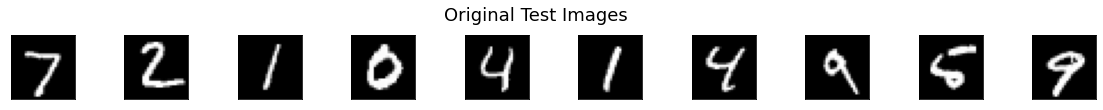

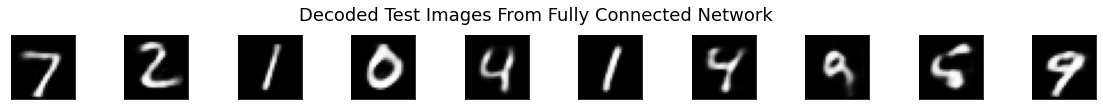

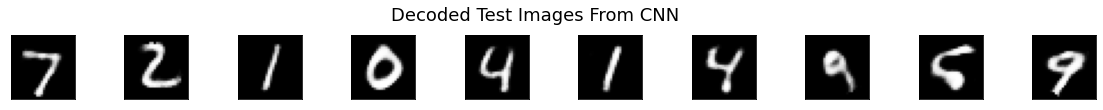

In [ ]:
#-------------------------------------------------------------------------------
# Plotting Original and Decoded Images
#-------------------------------------------------------------------------------

# Load test data
x_test = mnist.test.images
y_test = mnist.test.labels

# Original Test Images
plot_figures(x_test, 28, units_in_plot, "Original Test Images")

# Decoded Images From Fully Connected Network
plot_figures(x_hat, 28, units_in_plot, "Decoded Test Images From Fully Connected Network")

# Decoded Images From CNN
plot_figures(x_hat_conv, 28, units_in_plot, "Decoded Test Images From CNN")
 

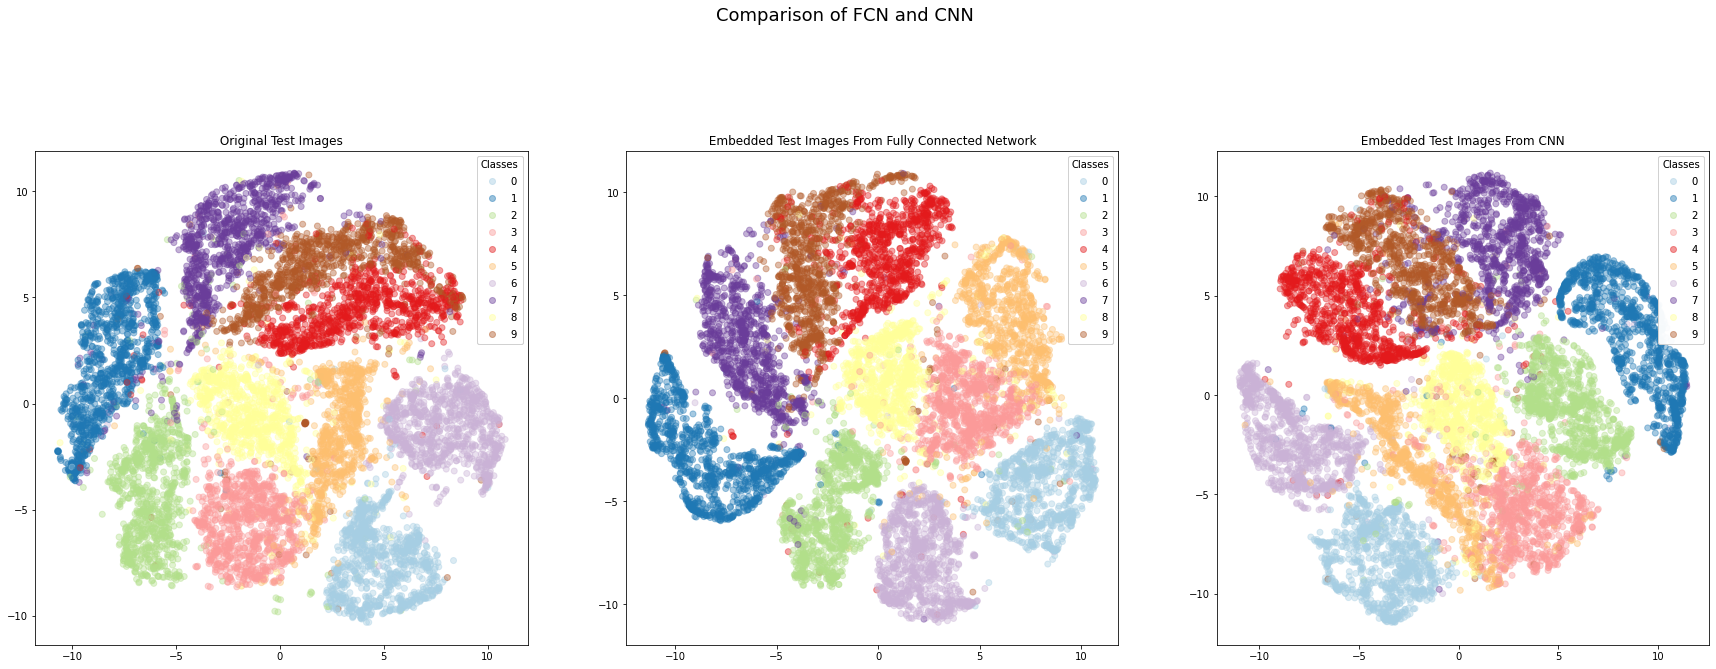

In [ ]:
#-------------------------------------------------------------------------------
# Plotting Original and Embedded Data In 2D Space 
#-------------------------------------------------------------------------------

input_tsne = convert_2D_tsne(x_test, y_test)
fc_tsne = convert_2D_tsne(embedded_images, y_test)
cnn_tsne = convert_2D_tsne(embedded_images_conv, y_test)

plot_2D(input_tsne, fc_tsne, cnn_tsne, y_test)


**Random Pick**

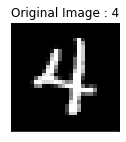

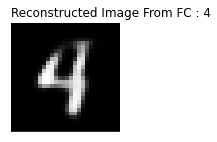

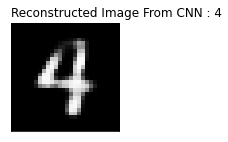

In [ ]:
#-------------------------------------------------------------------------------
# Random Pick 
#-------------------------------------------------------------------------------

rand_class = randrange(10)

rand_image_indis = choice(array(where(y_test == rand_class)).T)


plot_single_figure(x_test[rand_image_indis], 28, "Original Image : " + str(rand_class))

plot_single_figure(x_hat[rand_image_indis], 28, "Reconstructed Image From FC : " + str(rand_class))

plot_single_figure(x_hat_conv[rand_image_indis], 28, "Reconstructed Image From CNN : " + str(rand_class))
